## Classification DD's proteins using TwinSVM and dimers features

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

dd_dataset = pd.read_csv('./dataset/dd_separated_dimer_dataset.csv')
dd_dataset.head()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

,Fold,Protein name,F1,F2,F3,F4,F5,F6,F7,F8,...,F391,F392,F393,F394,F395,F396,F397,F398,F399,F400
0,Globm-like(alpha),2LHB,790.757707,1399.278353,1160.903046,1304.446194,1148.844103,1226.536499,1366.709337,1065.270900,...,2047.411499,1932.648648,2066.643207,1873.608234,2128.992637,1479.646794,1791.508381,1855.162705,2256.788191,2113.393006
1,Globm-like(alpha),3SDHA,1858.069057,2583.822269,2225.255813,2541.743965,2282.452582,2314.731649,2645.835706,2127.373864,...,3049.226743,2721.848606,3233.938243,3030.218287,3116.204002,2971.653669,3084.973696,2660.943795,3197.603940,3105.250496
2,Globm-like(alpha),1FLP,7.155008,230.267735,162.175731,161.391631,158.688111,219.089868,183.232620,253.579903,...,456.046522,442.254578,488.554104,476.692630,503.492418,407.816526,454.116052,441.108208,511.866271,512.277052
3,Globm-like(alpha),2HBG,366.744441,404.682260,359.577480,419.468181,374.871212,469.008454,321.988257,310.432062,...,780.581804,815.827219,816.061810,789.845319,831.392548,714.711919,823.400724,678.371956,831.392548,832.072321
4,Globm-like(alpha),2MGE,2742.199430,3507.138537,3380.188979,2845.115945,3185.902917,3051.498448,3128.557751,3184.984844,...,4284.268445,4235.922465,4173.931347,4061.108912,4149.400413,4094.231864,4094.404959,3879.324727,4143.189527,4180.038029


### Converting class labels to unique intergers

In [2]:
y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)
dd_dataset.head()

,Fold,class labels,Protein name,F1,F2,F3,F4,F5,F6,F7,...,F391,F392,F393,F394,F395,F396,F397,F398,F399,F400
0,Globm-like(alpha),0,2LHB,790.757707,1399.278353,1160.903046,1304.446194,1148.844103,1226.536499,1366.709337,...,2047.411499,1932.648648,2066.643207,1873.608234,2128.992637,1479.646794,1791.508381,1855.162705,2256.788191,2113.393006
1,Globm-like(alpha),0,3SDHA,1858.069057,2583.822269,2225.255813,2541.743965,2282.452582,2314.731649,2645.835706,...,3049.226743,2721.848606,3233.938243,3030.218287,3116.204002,2971.653669,3084.973696,2660.943795,3197.603940,3105.250496
2,Globm-like(alpha),0,1FLP,7.155008,230.267735,162.175731,161.391631,158.688111,219.089868,183.232620,...,456.046522,442.254578,488.554104,476.692630,503.492418,407.816526,454.116052,441.108208,511.866271,512.277052
3,Globm-like(alpha),0,2HBG,366.744441,404.682260,359.577480,419.468181,374.871212,469.008454,321.988257,...,780.581804,815.827219,816.061810,789.845319,831.392548,714.711919,823.400724,678.371956,831.392548,832.072321
4,Globm-like(alpha),0,2MGE,2742.199430,3507.138537,3380.188979,2845.115945,3185.902917,3051.498448,3128.557751,...,4284.268445,4235.922465,4173.931347,4061.108912,4149.400413,4094.231864,4094.404959,3879.324727,4143.189527,4180.038029


### Creating a training set from data frame

In [3]:
train_data = dd_dataset[['F%d' % i for i in range(1,401)]].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d\n Number of classes: %d" % (train_data.shape[0],
                                                                            train_data.shape[1],
                                                                               np.unique(y_true).size))

Number of samples: 311, Number of features: 400
 Number of classes: 27


### Save dataset

In [4]:
#dd_dataset[['class labels'] + ['F%d' % i for i in range(1,401)]].to_csv('./dataset/dd_dimer_num.csv',
 #                                                                       index=False)

### TwinSVMclassifier

In [5]:
# tsvm folder should be added to path for import
import sys
sys.path.insert(0, '/home/mir/mir-projects/bio-protein-recog/src/tsvm')

from tsvm import twinsvm

kernel = 'linear'

tsvm_model = twinsvm.OVO_TSVM(kernel=kernel)

### Define range of parameters for grid search

In [6]:
from sklearn.model_selection import GridSearchCV

c_range = {'C_1': [float(2**i) for i in range(-8, 9)],
             'C_2': [float(2**i) for i in range(-8, 9)]}

gamma_range = {'gamma': [float(2**i) for i in range(-10, 5)]} if kernel == 'RBF' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = 1 # Number of CPU threads

result = GridSearchCV(tsvm_model, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [7]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 289 candidates, totalling 2890 fits


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done 2890 out of 2890 | elapsed: 312.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=OVO_TSVM(C_1=1, C_2=1, gamma=1, kernel='linear'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C_2': [0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0], 'C_1': [0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [8]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 31.83


Accuracy:  75.88424437299035


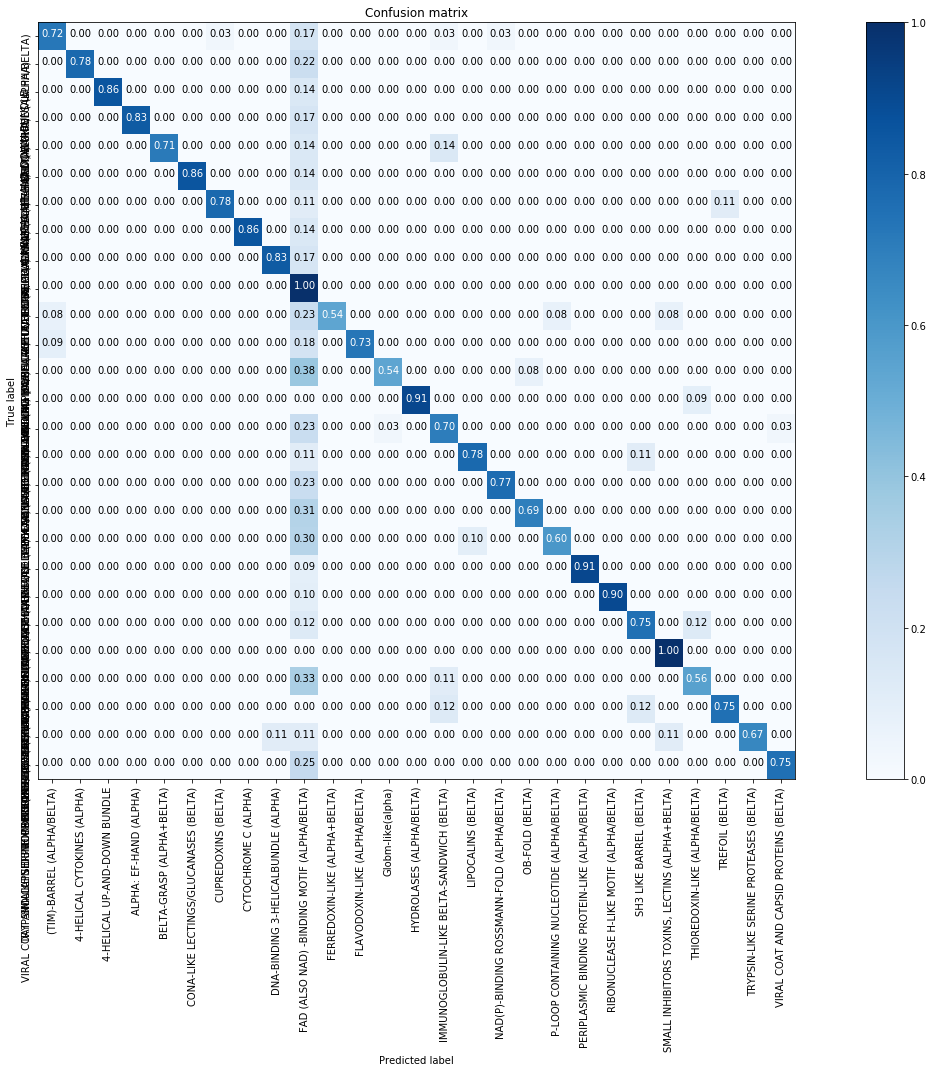

In [10]:
from misc import plt_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("./report/DD_confusion_matrix_TSVM.png", dpi=256)

In [11]:
print(classification_report(labels[y_true], labels[y_pred]))

                                                precision    recall  f1-score   support

                    (TIM)-BARREL (ALPHA/BELTA)       0.91      0.72      0.81        29
                   4-HELICAL CYTOKINES (ALPHA)       1.00      0.78      0.88         9
                  4-HELICAL UP-AND-DOWN BUNDLE       1.00      0.86      0.92         7
                        ALPHA: EF-HAND (ALPHA)       1.00      0.83      0.91         6
                     BELTA-GRASP (ALPHA+BELTA)       1.00      0.71      0.83         7
         CONA-LIKE LECTINGS/GLUCANASES (BELTA)       1.00      0.86      0.92         7
                           CUPREDOXINS (BELTA)       0.88      0.78      0.82         9
                          CYTOCHROME C (ALPHA)       1.00      0.86      0.92         7
           DNA-BINDING 3-HELICALBUNDLE (ALPHA)       0.91      0.83      0.87        12
   FAD (ALSO NAD) -BINDING MOTIF (ALPHA/BELTA)       0.17      1.00      0.29        11
                 FERREDOXIN-LIK